In [643]:
# Import appropriate libraries
import pandas as pd
import numpy as np
import datetime as dt
import pycountry
import pycountry_convert as pc
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

let's analyze the latest dataset in order to get  better understanding of the data and how COVID19 is affecting the world.

We will explore at how COVID19 has been growing throughout the world Since 22nd january 2020. We will be using various visualization tehniques to show the share of COVID19 Cases worldwide and explore the impact of virus.


In [644]:
df_train = pd.read_csv('c:\\Datasets-master\\covid_19_data.csv')
df_train.head()

,SNo,Date,Province_State,Country_Region,Last_Update,Confirmed,Fatalities,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [645]:
display(df_train.head())
display(df_train.describe())
display(df_train.info())

,SNo,Date,Province_State,Country_Region,Last_Update,Confirmed,Fatalities,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


,SNo,Confirmed,Fatalities,Recovered
count,21866.000000,21866.000000,21866.000000,21866.000000
mean,10933.500000,4186.011479,267.482027,1149.608250
std,6312.314829,19133.805875,1814.574950,7981.896646
min,1.000000,0.000000,0.000000,0.000000
25%,5467.250000,13.000000,0.000000,0.000000
50%,10933.500000,136.000000,2.000000,3.000000
75%,16399.750000,946.000000,14.000000,111.000000
max,21866.000000,321192.000000,29427.000000,189791.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21866 entries, 0 to 21865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SNo             21866 non-null  int64 
 1   Date            21866 non-null  object
 2   Province_State  10586 non-null  object
 3   Country_Region  21866 non-null  object
 4   Last_Update     21866 non-null  object
 5   Confirmed       21866 non-null  int64 
 6   Fatalities      21866 non-null  int64 
 7   Recovered       21866 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 1.3+ MB


None

In [646]:
# If any null values (as per dataset only Province/State shows null)
df_train.isnull().sum()

SNo                   0
Date                  0
Province_State    11280
Country_Region        0
Last_Update           0
Confirmed             0
Fatalities            0
Recovered             0
dtype: int64

In [647]:
df = df_train[['Date','Province_State','Country_Region','Last_Update','Confirmed','Fatalities','Recovered']]

In [648]:
df.head()

,Date,Province_State,Country_Region,Last_Update,Confirmed,Fatalities,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [649]:
#df_filtered = df_U.loc[df_U['Country_Region'] == US, ['Date', 'County']]

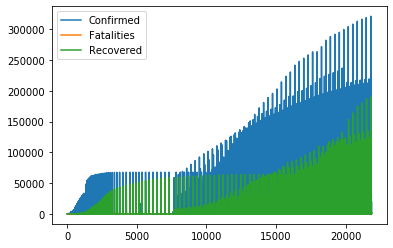

In [650]:
df.plot()

In [651]:
a = df1['Country_Region'].value_counts()
a

US                     652392
China                    6936
Canada                   2652
United Kingdom           2448
France                   2448
                        ...  
Lebanon                   204
Cameroon                  204
Antigua and Barbuda       204
Seychelles                204
Malaysia                  204
Name: Country_Region, Length: 187, dtype: int64

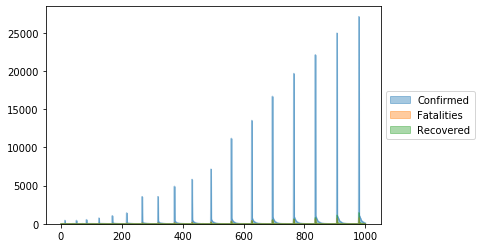

In [652]:
ax = df.loc[0:1000].plot.area(stacked=False,alpha=0.4)
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

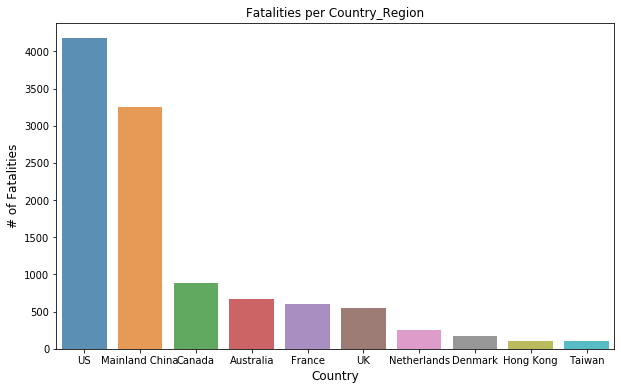

In [703]:
# number of Fatalities country wise
x=df.groupby(['Country_Region']).count()
x=x.sort_values(by='Fatalities',ascending=False)
x=x.iloc[0:10].reset_index()
x
# #plot
plt.figure(figsize=(10,6))
ax= sns.barplot(x.Country_Region, x.Confirmed, alpha=0.8)
plt.title("Fatalities per Country_Region")
plt.ylabel('# of Fatalities', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

In [654]:
df.columns

Index(['Date', 'Province_State', 'Country_Region', 'Last_Update', 'Confirmed',
       'Fatalities', 'Recovered'],
      dtype='object')

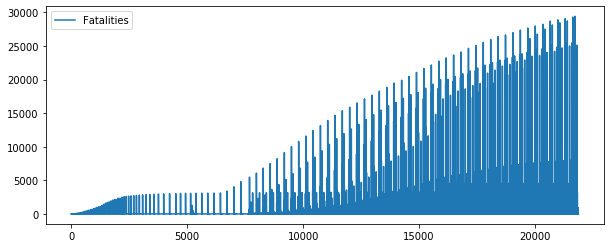

In [655]:
# Plot to show TargetValue
df['Fatalities'].plot(legend=True,figsize=(10,4))
plt.show()

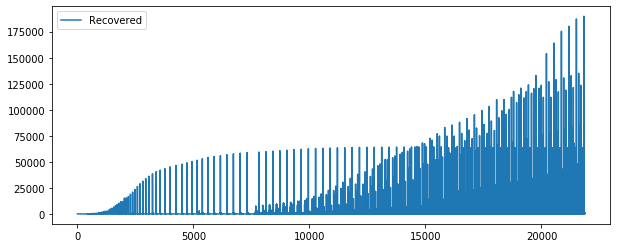

In [656]:
# Plot to show Country_wise Population
df['Recovered'].plot(legend=True,figsize=(10,4))
plt.show()

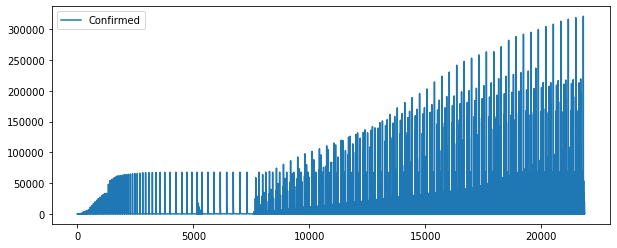

In [657]:
# Plot to show Weight
df['Confirmed'].plot(legend=True,figsize=(10,4))
plt.show()

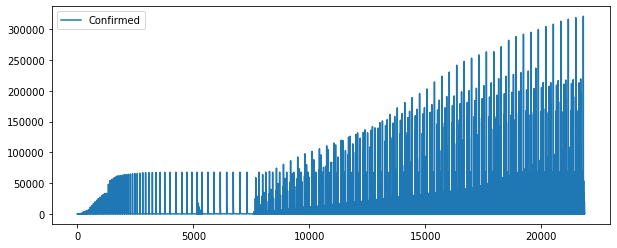

In [658]:
# Plot to show Weight
df['Confirmed'].plot(legend=True,figsize=(10,4))
plt.show()

In [659]:
df.columns

Index(['Date', 'Province_State', 'Country_Region', 'Last_Update', 'Confirmed',
       'Fatalities', 'Recovered'],
      dtype='object')

Text(0.5, 1, 'Confirmed vs Recovered')

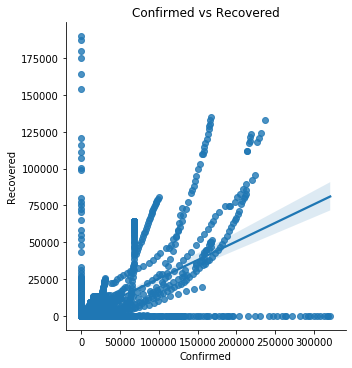

In [660]:
sns.lmplot(x='Confirmed', y = 'Recovered', data = df)
plt.title('Confirmed vs Recovered')

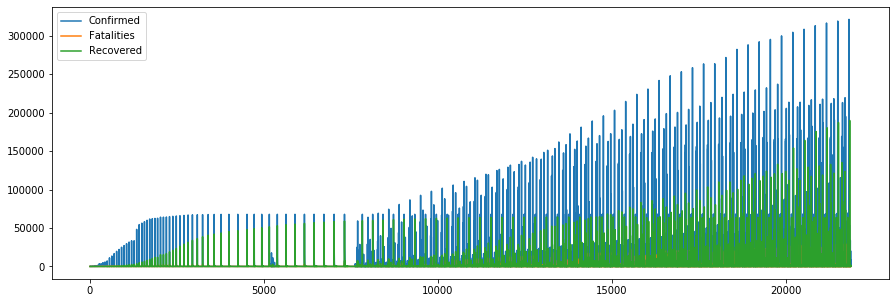

In [661]:
# Plot to check Status of the different columns
df.plot(legend=True,figsize=(15,5))
plt.show()

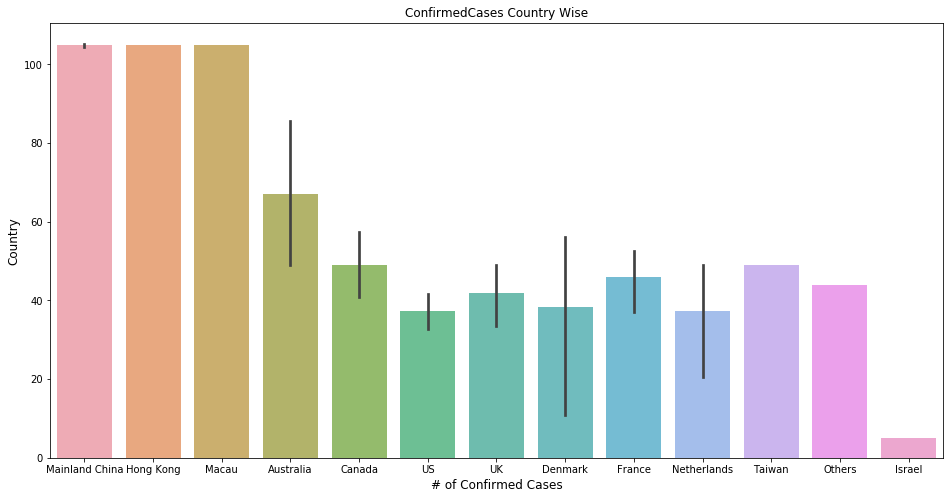

In [662]:
# number of Confirmed cases per Country
x=df.groupby(['Country_Region', 'Province_State']).count()
x=x.sort_values(by='Confirmed',ascending=False)
x=x.iloc[0:200].reset_index()
x
# #plot
plt.figure(figsize=(16,8))
ax= sns.barplot(x.Country_Region, x.Fatalities, alpha=0.8)
plt.title("ConfirmedCases Country Wise")
plt.xlabel('# of Confirmed Cases', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

In [663]:
df.columns

Index(['Date', 'Province_State', 'Country_Region', 'Last_Update', 'Confirmed',
       'Fatalities', 'Recovered'],
      dtype='object')

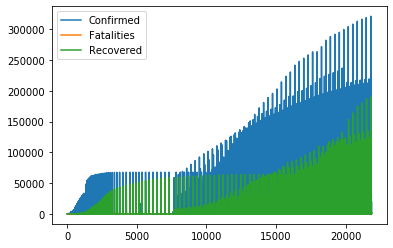

In [664]:
df.plot()

Text(0.5, 1, 'Country_Region wise')

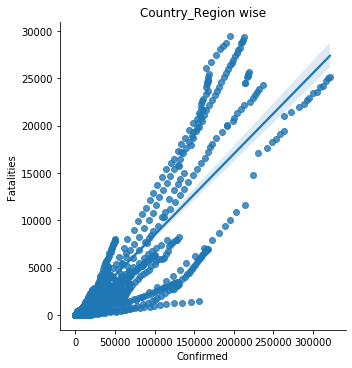

In [665]:
sns.lmplot(x='Confirmed', y = 'Fatalities', data = df)
plt.title('Country_Region wise')

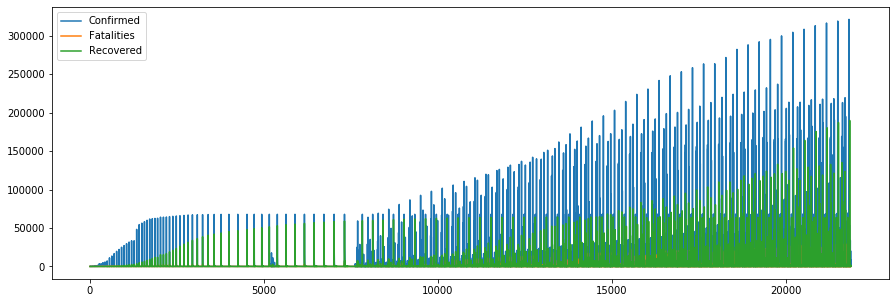

In [666]:
# Plot to check ConfirmedCases and Fatalities
df.plot(legend=True,figsize=(15,5))
plt.show()

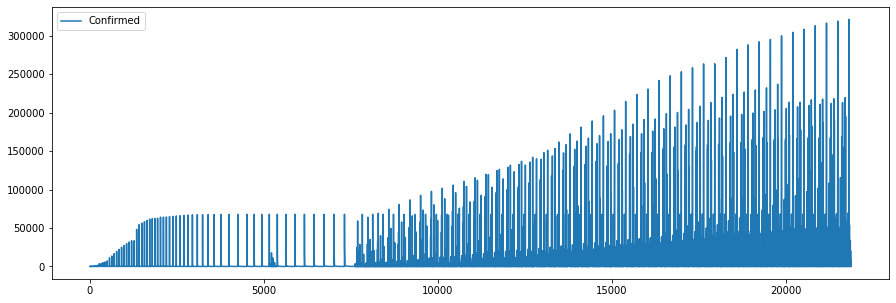

In [667]:
# Plot to show Confirmed cases
df['Confirmed'].plot(legend=True,figsize=(15,5))
plt.show()

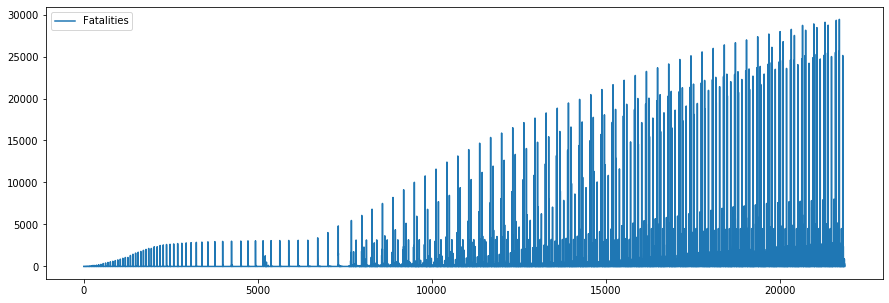

In [668]:
# Plot to show Fatalities cases
df['Fatalities'].plot(legend=True,figsize=(15,5))
plt.show()

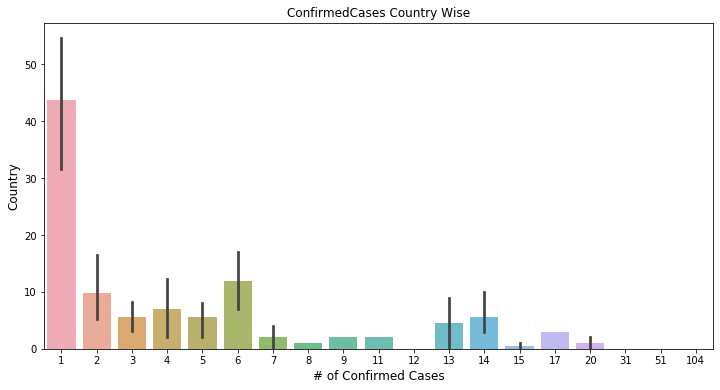

In [669]:
# number of Confirmed cases per Country
x=df.groupby(['Country_Region', 'Fatalities']).count()
x=x.sort_values(by='Country_Region',ascending=False)
x=x.iloc[0:100].reset_index()
x
# #plot
plt.figure(figsize=(12,6))
ax= sns.barplot(x.Confirmed, x.Fatalities, alpha=0.8)
plt.title("ConfirmedCases Country Wise")
plt.xlabel('# of Confirmed Cases', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

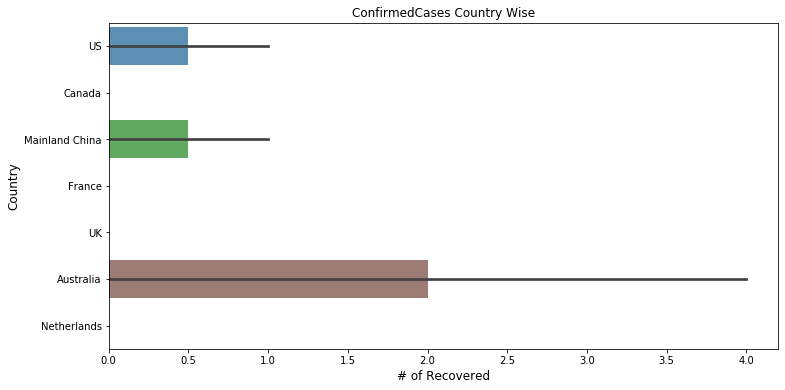

In [670]:
# number of Recovered cases per Country
x=df.groupby(['Country_Region', 'Recovered']).count()
x=x.sort_values(by='Confirmed',ascending=False)
x=x.iloc[0:10].reset_index()
x
# #plot
plt.figure(figsize=(12,6))
ax= sns.barplot(x.Recovered, x.Country_Region, alpha=0.8)
plt.title("ConfirmedCases Country Wise")
plt.xlabel('# of Recovered', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

In [671]:
# How many countries affected 
countries = df['Country_Region'].unique()
print(f'{len(countries)} countries are in dataset:\n{countries}')

222 countries are in dataset:
['Mainland China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam' 'Australia'
 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada' 'Cambodia'
 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland' 'United Arab Emirates'
 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain' 'Belgium' 'Others' 'Egypt'
 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait'
 'Austria' 'Algeria' 'Croatia' 'Switzerland' 'Pakistan' 'Georgia' 'Greece'
 'North Macedonia' 'Norway' 'Romania' 'Denmark' 'Estonia' 'Netherlands'
 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland' 'Lithuania' 'New Zealand'
 'Nigeria' 'North Ireland' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar'
 'Ecuador' 'Azerbaijan' 'Czech Republic' 'Armenia' 'Dominican Republic'
 'Indonesia' 'Portugal' 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia'
 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine' 'Saint Barthelemy'
 'Hungary' 'Faroe Islands' 'Gibraltar' 'Li

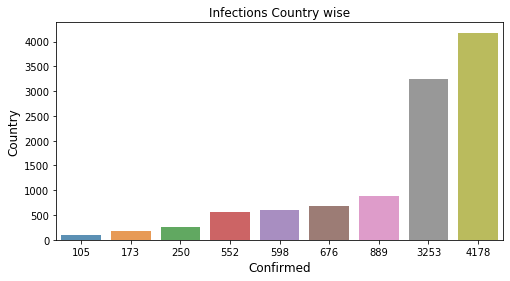

In [672]:
# number of Confirmed cases 
x=df.groupby(['Country_Region']).count()
x=x.sort_values(by='Confirmed',ascending=False)
x=x.iloc[0:10].reset_index()
x
# #plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.Confirmed, x.Fatalities, alpha=0.8)
plt.title("Infections Country wise")
plt.ylabel('Country', fontsize=12)
plt.xlabel('Confirmed', fontsize=12)
plt.show()

In [673]:
df.columns

Index(['Date', 'Province_State', 'Country_Region', 'Last_Update', 'Confirmed',
       'Fatalities', 'Recovered'],
      dtype='object')

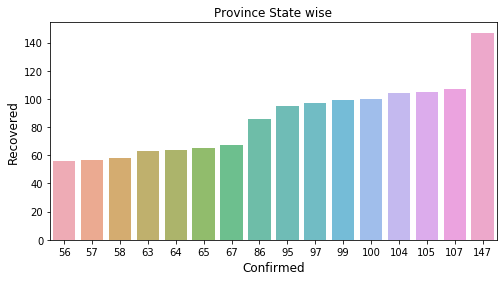

In [701]:
# number based on Province and Targets
x=df.groupby(['Province_State']).count()
x=x.sort_values(by='Fatalities',ascending=False)
x=x.iloc[0:100].reset_index()
x
# #plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.Confirmed, x.Recovered, alpha=0.8)
plt.title("Province State wise")
plt.ylabel('Recovered', fontsize=12)
plt.xlabel('Confirmed', fontsize=12)
plt.show()

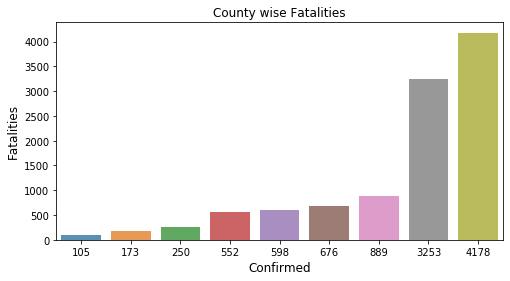

In [702]:
# number based on County wise and Targets
x=df.groupby(['Country_Region']).count()
x=x.sort_values(by='Confirmed',ascending=False)
x=x.iloc[0:10].reset_index()
x
# #plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.Confirmed, x.Fatalities, alpha=0.8)
plt.title("County wise Fatalities")
plt.ylabel('Fatalities', fontsize=12)
plt.xlabel('Confirmed', fontsize=12)
plt.show()

In [676]:
df.columns

Index(['Date', 'Province_State', 'Country_Region', 'Last_Update', 'Confirmed',
       'Fatalities', 'Recovered'],
      dtype='object')

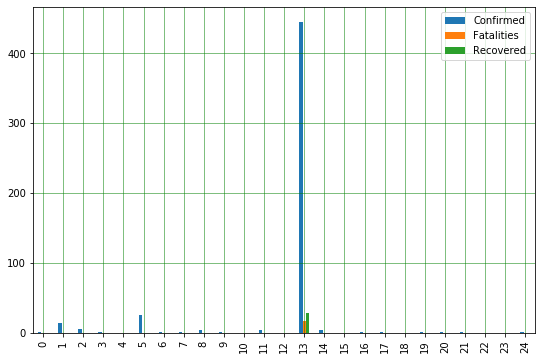

In [677]:
df2 = df.head(25)
df2.plot(kind='bar',figsize=(9,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

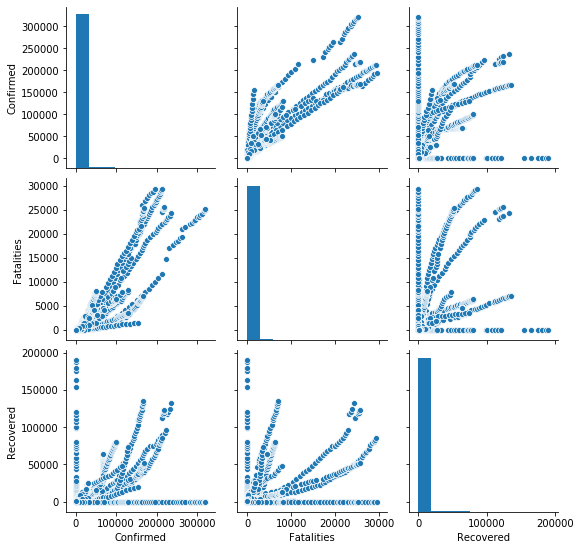

In [678]:
sns.pairplot(df)

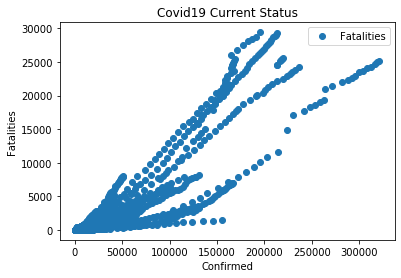

In [679]:
df.plot(x='Confirmed', y='Fatalities', style='o')  
plt.title('Covid19 Current Status')  
plt.xlabel('Confirmed')  
plt.ylabel('Fatalities')  
plt.show()

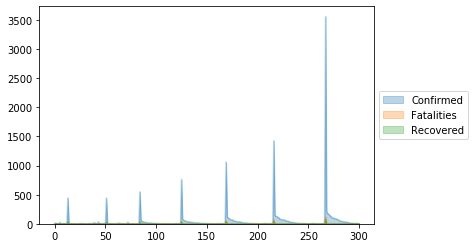

In [680]:
# Overall status of Confirmed vs Fatalities and Revocered
ax = df.loc[0:300].plot.area(stacked=False,alpha=0.3)
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

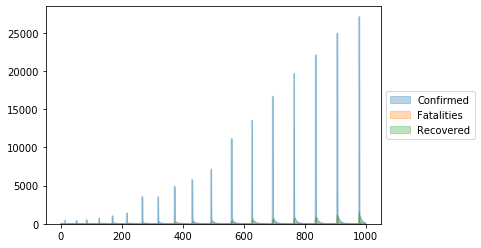

In [681]:
# Overall status of Confirmed vs Fatalities and Revocered
ax = df.loc[0:999].plot.area(stacked=False,alpha=0.3)
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

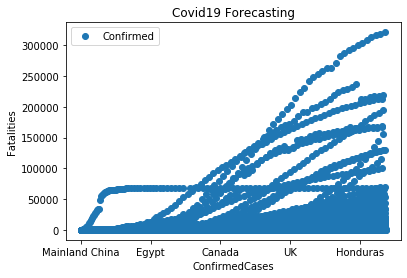

In [682]:
df.plot(x='Country_Region', y='Confirmed', style='o')  
plt.title('Covid19 Forecasting')  
plt.xlabel('ConfirmedCases')  
plt.ylabel('Fatalities')  
plt.show()

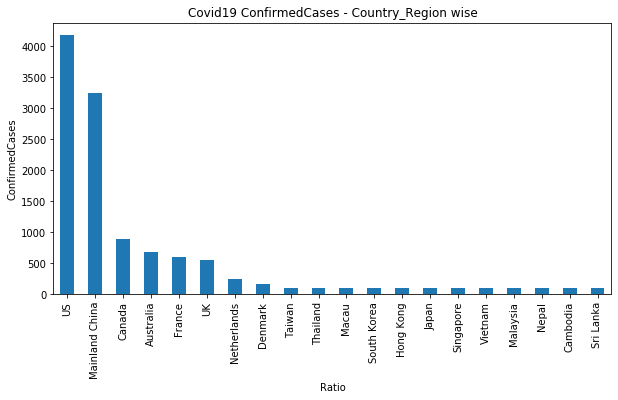

In [683]:
# Plot to check Confirmed cases by Country 
df.Country_Region.value_counts().nlargest(20).plot(kind='bar', figsize=(10,5))
plt.title("Covid19 ConfirmedCases - Country_Region wise")
plt.ylabel("ConfirmedCases")
plt.xlabel("Ratio");

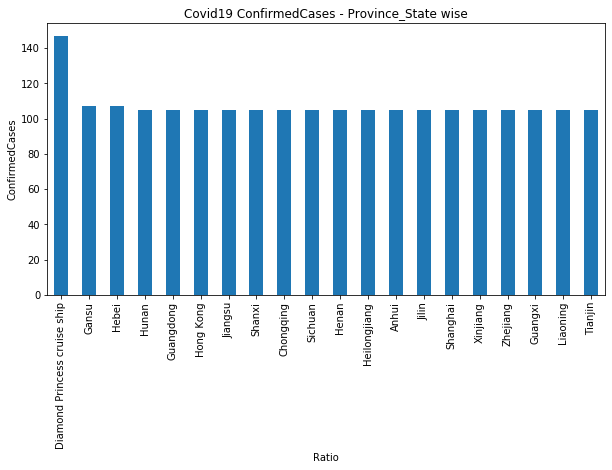

In [684]:
# Plot to check Confirmed cases by Province_State 
df.Province_State.value_counts().nlargest(20).plot(kind='bar', figsize=(10,5))
plt.title("Covid19 ConfirmedCases - Province_State wise")
plt.ylabel("ConfirmedCases")
plt.xlabel("Ratio");

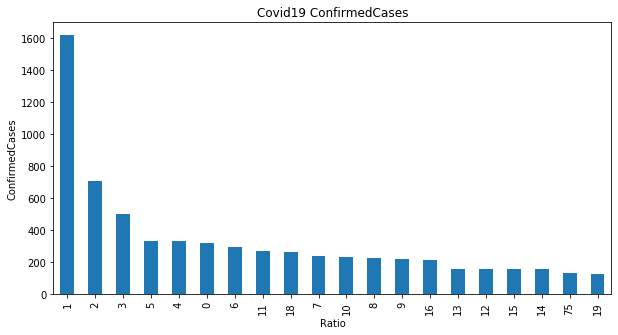

In [685]:
# Plot to check Confirmed cases 
df.Confirmed.value_counts().nlargest(20).plot(kind='bar', figsize=(10,5))
plt.title("Covid19 ConfirmedCases")
plt.ylabel("ConfirmedCases")
plt.xlabel("Ratio");

In [686]:
df_test.columns

Index(['ForecastId', 'County', 'Province_State', 'Country_Region',
       'Population', 'Weight', 'Date', 'Target'],
      dtype='object')

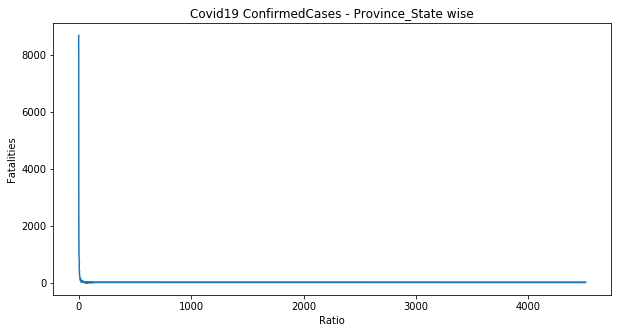

In [687]:
# Plot to check Confirmed cases by County
df.Fatalities.value_counts().nlargest(80).plot(kind='line', figsize=(10,5))
plt.title("Covid19 ConfirmedCases - Province_State wise")
plt.ylabel("Fatalities")
plt.xlabel("Ratio");

In [688]:
#sns.clustermap(df)

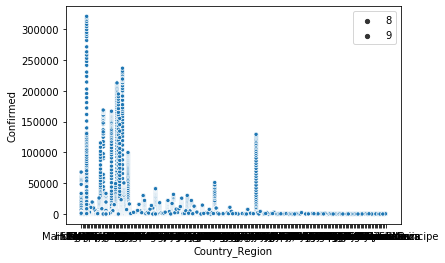

In [700]:
# Graph to show top confirmed cases by top countries
top_countries = df.index[:150]
df_top_countries = df[df['Country_Region'].isin(top_countries)]
ax = sns.scatterplot(x="Country_Region", y="Confirmed", size=9, data=df)

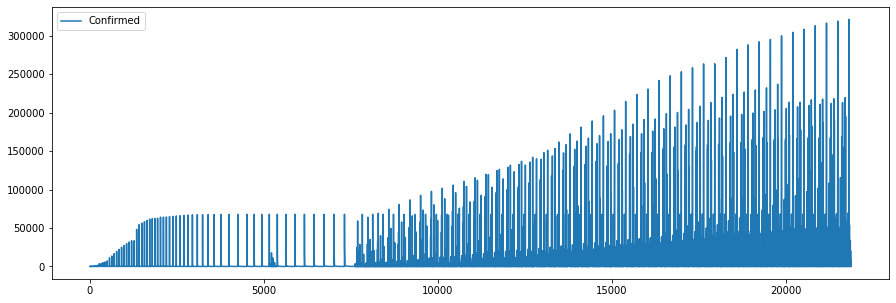

In [690]:
# Plot to show Confirmed cases
df['Confirmed'].plot(legend=True,figsize=(15,5))
plt.show()

In [691]:
#Get the top 10 countries
last_date = df.Date.max()
df_countries = df[df['Date']==last_date]
df_countries = df_countries.groupby('Country_Region', as_index=False)['Confirmed','Fatalities'].sum()
df_countries = df_countries.nlargest(10,'Confirmed')
#Get the trend for top 10 countries
df_trend = df.groupby(['Date','Country_Region'], as_index=False)['Confirmed','Fatalities'].sum()
df_trend = df_trend.merge(df_countries, on='Country_Region')
#df_trend.drop(['ConfirmedCases_y','Fatalities_y'],axis=1, inplace=True)
#df_trend.rename(columns={'Country_Region':'Country', 'ConfirmedCases_x':'Cases', 'Fatalities_x':'Deaths'}, inplace=True)
#Add columns for studying logarithmic trends
#df_trend['ln(Cases)'] = np.log(df_trend['Cases']+1)# Added 1 to remove error due to log(0).
#df_trend['ln(Deaths)'] = np.log(df_trend['Deaths']+1)

In [692]:
df_countries.head()

,Country_Region,Confirmed,Fatalities
176,US,1204351,71064
159,Spain,219329,25613
84,Italy,213013,29315
175,UK,196243,29501
60,France,170687,25537


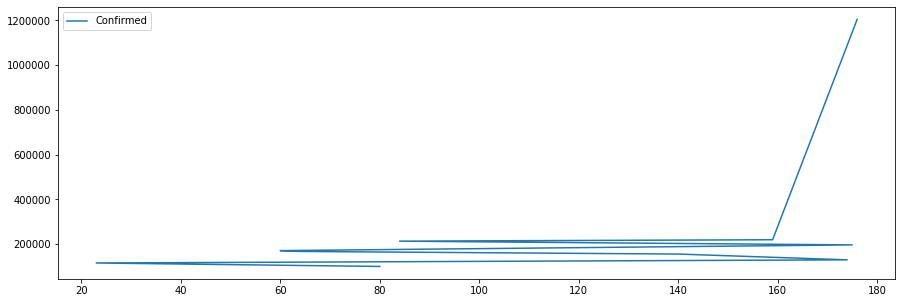

In [693]:
# Plot to show Confirmed cases
df_countries['Confirmed'].plot(legend=True,figsize=(15,5))
plt.show()

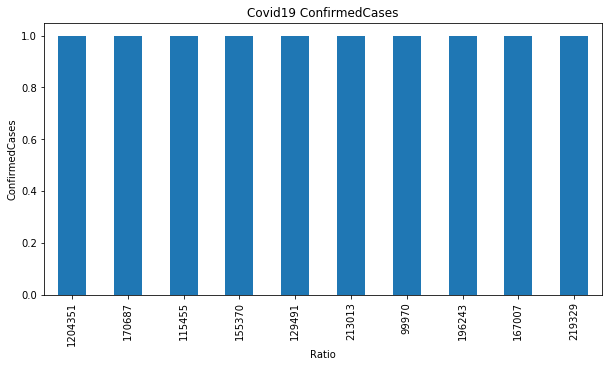

In [694]:
# Plot to check Confirmed cases by Country
df_countries.Confirmed.value_counts().nlargest(20).plot(kind='bar', figsize=(10,5))
plt.title("Covid19 ConfirmedCases")
plt.ylabel("ConfirmedCases")
plt.xlabel("Ratio");

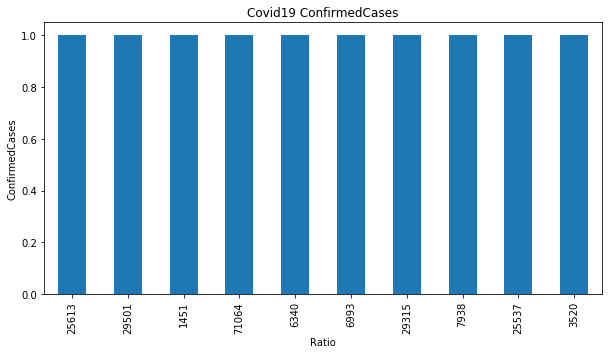

In [695]:
# Plot to check Confirmed cases by County for test dataset
df_countries.Fatalities.value_counts().nlargest(20).plot(kind='bar', figsize=(10,5))
plt.title("Covid19 ConfirmedCases")
plt.ylabel("ConfirmedCases")
plt.xlabel("Ratio");

In [704]:
df.columns

Index(['Date', 'Province_State', 'Country_Region', 'Last_Update', 'Confirmed',
       'Fatalities', 'Recovered'],
      dtype='object')

In [706]:
df.rename(columns={'Date': 'ObservedDate','Last_Update': 'Last/Update'}, inplace=True)

#data.rename(columns={'gdp':'log(gdp)'}, inplace=True)

In [707]:
df.head()

,ObservedDate,Province_State,Country_Region,Last/Update,Confirmed,Fatalities,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
